<a href="https://colab.research.google.com/github/JcMN/Machine-Learning/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Deep Neural Network construction

In [ ]:
#Import the relevant libraries
import tensorflow as tf
from tensorflow import keras
from keras import layers, models, optimizers, callbacks, regularizers
import matplotlib.pyplot as plt
import numpy as nump
import pandas as pa
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import metrics


#Auto update to tenserflow 2 if needed
if tf.__version__ < "2.0.0":
  !pip install --upgrade tensorflow_gpu==2.0

In [ ]:
#Showing Data Information form the dataset
data = pa.read_csv("../content/star_classification.csv")

data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
#Feature selection
#We will start by dropping the target being class and the IDs as they only serve as identifiers and do not affect for prediction
X = data.drop(['class', 'obj_ID', 'run_ID', 'rerun_ID', 'field_ID', 'fiber_ID', 'spec_obj_ID'], axis=1)
y = data['class'].values

#y is of type object and for the DNN we need to have it as a numeric value so we encode it
encoder = LabelEncoder()
y = encoder.fit_transform(y)

#Scaler application, scaling the data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#Train test split with the train size being 33% of the total dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.33, random_state=3)


In [ ]:
#Creation of the DNN, "is it really that deep?" - ChatGPT gave some pointers on how to tackle everything!
input = layers.Input(shape=(X_train.shape[1],))

x = layers.Dense(512, activation='relu', kernel_regularizer = regularizers.l2(0.001))(input)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.25)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.15)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.15)(x)
x = layers.Dense(32, activation='relu')(x)

output = layers.Dense(3, activation = 'softmax')(x)

#Constructing the DNN model
model = models.Model(inputs=input, outputs=output)

#Callback setup
reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=8, min_lr=0.001)

#Optimizer setup
initial_lr = 0.001
lr_schedule = optimizers.schedules.ExponentialDecay(initial_lr, decay_steps=1000, decay_rate=0.96, staircase=True)

adam = optimizers.Adam(learning_rate=lr_schedule)

#Summary of the model
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 11)]              0         
                                                                 
 dense_17 (Dense)            (None, 512)               6144      
                                                                 
 batch_normalization_6 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_7 (Bat  (None, 256)               1024      
 chNormalization)                                          

In [ ]:
#Compilation
model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics=["accuracy"])
#Fast history run yay
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[reduce_lr], batch_size = 64)

Epoch 1/20
516/516 [==============================] - 13s 22ms/step - loss: 0.3170 - accuracy: 0.8884 - val_loss: 0.4387 - val_accuracy: 0.8486 - lr: 0.0010
Epoch 2/20
516/516 [==============================] - 8s 16ms/step - loss: 0.2020 - accuracy: 0.9400 - val_loss: 0.2468 - val_accuracy: 0.9226 - lr: 9.6000e-04
Epoch 3/20
516/516 [==============================] - 10s 19ms/step - loss: 0.1756 - accuracy: 0.9490 - val_loss: 0.1617 - val_accuracy: 0.9497 - lr: 9.6000e-04
Epoch 4/20
516/516 [==============================] - 7s 15ms/step - loss: 0.1656 - accuracy: 0.9537 - val_loss: 0.1351 - val_accuracy: 0.9636 - lr: 9.2160e-04
Epoch 5/20
516/516 [==============================] - 11s 21ms/step - loss: 0.1581 - accuracy: 0.9542 - val_loss: 0.1421 - val_accuracy: 0.9607 - lr: 9.2160e-04
Epoch 6/20
516/516 [==============================] - 10s 19ms/step - loss: 0.1532 - accuracy: 0.9563 - val_loss: 0.2052 - val_accuracy: 0.9303 - lr: 8.8474e-04
Epoch 7/20
516/516 [====================

In [ ]:
#Test accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

2094/2094 [==============================] - 5s 3ms/step - loss: 0.1225 - accuracy: 0.9660
Test Accuracy: 96.60%


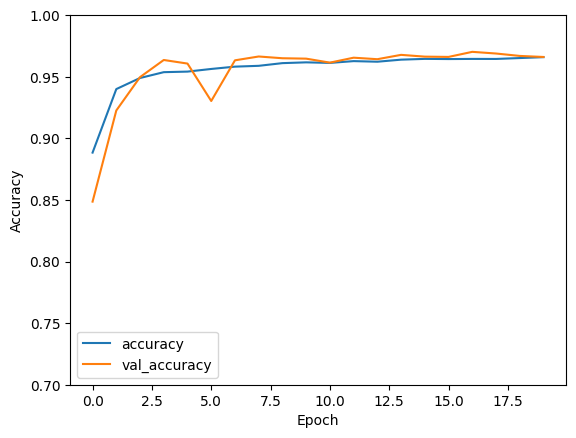

In [ ]:
# We can plot the history of the accuracy and see how it improves over time (epochs)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.7, 1])
plt.legend(loc='best')

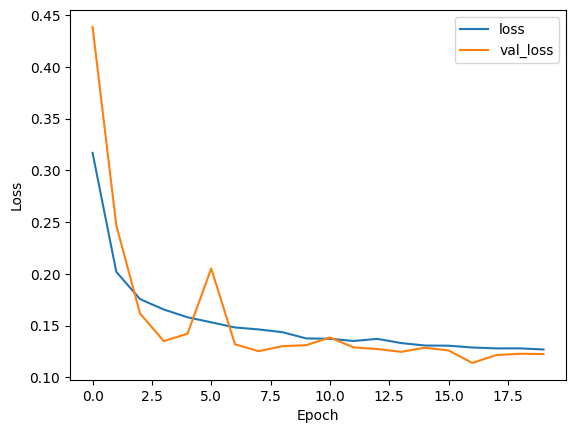

In [ ]:
# We can plot the history of the loss (cost function) and see how it decreases
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

2094/2094 [==============================] - 6s 3ms/step


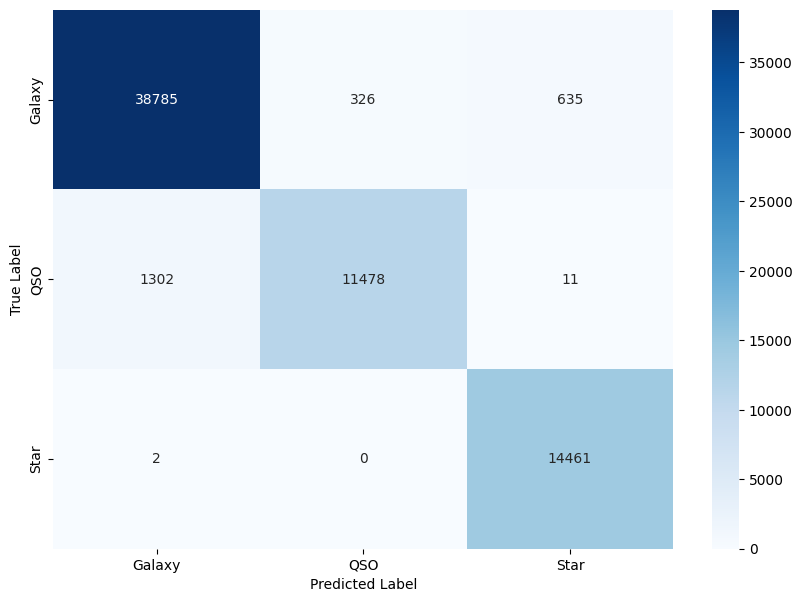

In [ ]:
#FROM CHATGPT!
import seaborn as sns
y_prediction = model.predict(X_test)
predictions = nump.argmax(y_prediction, axis=1)
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Galaxy", "QSO", "Star"], yticklabels=["Galaxy", "QSO", "Star"])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

2. Comparison of the results between the DNN and the traditional models

The results from the DNN are interesting and surprising. The amount of data observations in the dataset is 100,000 which normally would point that unsing a DNN is overkill as DNN perform better the more observations it has. The DNN after compilation has an accuracy of around 96%-97% making it just as accurate as the classical model tested.The DNN did not show any obvious sign of overfitting or underfitting as the loss kept decreasing by each epoch and the accuracy improvement showed that there is effective learning. All the tuning done was not as much as one could do so even more increases in accuracy are probably possible and should be explored. Also using the parent dataset, SDSS 2017, could provide more data for better results as it contains millions of observations.

For a refreser, the classical models tested were Logistic Regression, Decision Trees and K Nearest Neighbours. Of these, the Logistic Regression was discarded as the data seemed to not fit the model at all as it failed to converge at all after a lot of tuning to try and make it work. It suffered from underfitting. KNN also suffered from underfitting but it was not as drastic as such the results were better but still should not be taken into account until further tuning. Decision Tree was the only model that did not suffer from any obvious issue and fitted the data the best providing a high degree of accuracy.

We are going to mainly compare Decision Tree with the DNN as both managed to fit the data accurately and predict well enough the data. Both had a high degree of accuracy of around 97% with the Decision Tree being just slightly better. The most interesting point to analyze in my opinion is the confusion matrix of both models. The Decision Tree confusion matrix shows higher accuracy in providing true positives on every class but only by a slight margin whn compared to the DNN. Other data like false negatives also point to the same conclusion of the Decision Tree being better by a small margin when compared to the DNN.

3. Conclusions

There are many reasons why the DNN may have not performed as well as the Decision Tree but still better than the KNN or Logistic Regression. Discarding the KNN and Logistic Regression as those were failures, the overall trend seems to indicate that due to the dataset's characteristics may have been just a better fit to Decision Trees than to the DNN. Also it is important to understand that DNN need large amount of datas to truly be useful and 100,000 observations may not be enough. It is interesting that even taking all of that into consideration, the DNN still performed almost as well as the Decision Tree and futher tuning could led to it outperforming the classical model completly. In fact I will look forward to continue playing with the DNN until It can get to that point.

In conclusion, the DNN still can perform better with further tuning but for now the dataset seems to fit better the structure of Decision Trees and related models like Random Forests according to research done.



